# Part 2: A Simple Agent Based Model In Python

##### Authors: Bill Thompson (biltho@mpi.nl) and Limor Raviv (limor.raviv@mpi.nl)
Please let us know if you have any comments, suggestions or questions regarding this notebook.

---------------

## Summary
In this second tutorial, we will build our first simple network of agents using the commands in the first notebook.
We will create a network of multiple simple agents who interact in random dyads, and simulate changes in the community over multiple interactions. 
In each interaction, one agent (the producer) produces one of two possible vowel variants according to their prior representations. Then, the second agent (the listener) can either stick to their prior variant, or adapt to the producer by changing their prior vowel accordingly. The listener's behavior is determined based on prior "personalities": agents can be flexible (adapt to their partner) or stubborn (not adapt).
We repeat this process multiple times and see what happens to the variants. We will try to answer questions like: Has one of them spread to the entire community? Does this depend on the community's size and inital structure? How many stubborn people are required to avoid convergence? etc.

-------------- 


### 1. Setting the network
First, let's create lists containing the possible priors for our agents. We will create a seperate list for the possible vowel representations and for the possible personalties our agents can have:

In [3]:
# Setting the parameters

vowels = ['a', 'i']

personalities = ['F', 'S'] # F= Flexible, S=Stubborn

And let's write a simple function to create agents (lists of parameters):

In [4]:
def make_agent(vowel, personality):
    return [vowel, personality]

# For examaple, we can create a flexible agent with the vowel 'i' using our function

agent_one = make_agent(vowels[1], personalities[0])
print agent_one

['i', 'F']


Now, we can write functions that make populations of N agents (again, in the form of a list):

In [5]:
# Create a function that generates a population of N identical agents with given parameters

def make_population_identical(N):
    
    population = []
    
    for i in range(N):
        
        agent = make_agent(vowels[1], personalities[0])
        
        population.append(agent)

    return population


# Call the function to make a population of 5 identical agents

population_test = make_population_identical(5)
print population_test

[['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F']]


In [6]:
# Create a function that generates of population of N agents with randomly selected parameters from each list
# using "random.choice()"

import random

def make_population_random(N):
    
    population = []
    
    for i in range(N):
        
        v = random.choice(vowels)
        
        p = random.choice(personalities)
        
        agent = make_agent(v, p)
        
        population.append(agent)

    return population

You can run the box of code below multiple times to make sure you are really getting random populations:

In [8]:
# Call the function to make a population of 5 random agents
population = make_population_random(5)
print population

[['i', 'F'], ['a', 'F'], ['i', 'F'], ['a', 'F'], ['a', 'S']]


In [10]:
# You can achieve the same goal using "random.int()" and using the index of the lists of possible parameters

def make_population(N):
    
    population = []
    
    for i in range(N):
        
        v = random.randint(0,1)
        
        p = random.randint(0,1)
        
        agent = make_agent(vowels[v], personalities[p])
        
        population.append(agent)

    return population

# Call the funtion and make a population of 8 random agents
# You can play with the numbers to make bigger or smaller populations
pop = make_population(8)
print pop

[['i', 'S'], ['i', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F']]


In [45]:
# Create a function that calculates the proportion of agents with the variant 'a' in the population

def count(population):
    t = 0.     
    for agent in population:
        if agent[0] == 'a':
            t += 1            # The syntax =+ Adds 1 to t (or: t = t + 1)
    return t / len(population)

For a given population, we can now check how many agents are using each possible vowel variant. This is important, because later we'll also want to see how the proportion of each variant changes over the course of multiple interactions.

For this, we'll write a function that calculates the proportion of a given vowel in a population:

In [51]:
# Call the funtion on a population of 20 random agents
# You can run this box multiple times to see the proportion in different populations of different sizes

prop_a = count(make_population(20))

print 'The proportion of [a] in the population is', prop_a

The proportion of [a] in the population is 0.45


### 2. Interaction time!
We have a population, and now we want the agents to interact with each other. 

So first, we need to make a function that randomly selects two agents from the population:

In [14]:
from numpy.random import choice

def choose_pair(population):
    i = random.randint(0, len(population) - 1) # phyton counts from 0, so pop(8) is an error
    j = random.randint(0, len(population) - 1)
    
    while i == j:
        j = random.randint(0, len(population) - 1) # make sure the same agent is not selected twice
        
    return population[i], population[j]


# And we'll test it to see that really does what we want
# You can run this box of code multiple times to make sure you are really getting random pairs

pop = make_population(8)
listener, producer = choose_pair(pop)

print 'The population is', population
print 'This is the chosen pair', listener, producer
print 'The listener is', listener
print 'The producer is', producer

The population is [['i', 'F'], ['a', 'F'], ['i', 'F'], ['a', 'F'], ['a', 'S']]
This is the chosen pair ['i', 'S'] ['i', 'S']
The listener is ['i', 'S']
The producer is ['i', 'S']


Now, let's write a function that makes this pair "interact"!

If the producer and listener have the same vowel represenation, noting changes. If the have different vowels, then the listener's action depends on their prior personality: if they are stubborn, they will not change their vowel; but if they are flexible, they will update their vowel according to the producer.

So if the listener is flexible and has a different variant than the producer, we want to update the listener's prior based on the producer's vowel.

To do this, we'll need to use a "deep copy" of the producer rather than the producer itself, because otherwise Python will have these two agents linked togeher forever. This is of course unwanted, since we want to update the listener only once based on a single interaction. Therefore, we'll use function called "deepcopy", which basically does what we want except for not linking the actual agents together.

In [127]:
def interact_test((listener,producer)): 
    
    if listener[0] == producer[0]:
        return listener
    else:
        if listener[1]=='S':
            return listener
        else:
            listener[0]=deepcopy(producer[0])
            return listener

You can check the output of the loop by running the code line below multiple times:

In [42]:
randomlistener, randomproducer = choose_pair(make_population(8))

print 'The listener is', randomlistener
print 'The producer is', randomproducer

updated_listener = interact_test((randomlistener, randomproducer))

print 'After ineracting, the listener is',updated_listener

The listener is ['a', 'F']
The producer is ['a', 'S']
After ineracting, the listener is ['a', 'F']


So now we have a tested function that updates agents after interaction. Since we don't actually need the function to return the listener as output, we can change it to have no output, only to update the agents if needed:

In [128]:
# Create a function that only updates agents using "pass"

def interact((listener,producer)): 
    
    if listener[0] == producer[0]:
        pass   # do nothing
    else:
        if listener[1]=='S':
            pass
        else:
            listener[0]=deepcopy(producer[0])

### 3. Simulation time!
The next step is to create a function that loops over the entire population based on a given number of wanted interactions and check how many agents are using each possible vowel variant over time. 

In [52]:
# Create a function that simulates a community of size N interacting randomly for K times       

def simulate(n, k):
    
    population = make_population(n)
    
    # print "Initial Population:", population
    
    proportion = []
    
    for i in range(k):
        
        pair = choose_pair(population)
        
        interact(pair)
        
        proportion.append(count(population))
    
    return population, proportion


Let's check that our function works by plotting the change in proportions of vowels over time. Again, you can run this multiple times to see what happens in different communities, and also change the numbers as you wish. 

Final Population: [['a', 'F'], ['i', 'F'], ['a', 'F'], ['i', 'S'], ['a', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'F'], ['i', 'F'], ['a', 'S'], ['a', 'F'], ['a', 'S'], ['i', 'S'], ['a', 'F'], ['a', 'S'], ['i', 'S'], ['a', 'S']]
   
Changes in the proportion of [a] over time


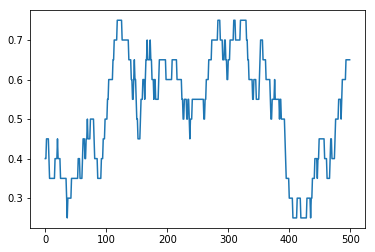

In [67]:
# Simulate 500 intaerctions between 20 agents 
new_population, proportion = simulate(20, 500)
print "Final Population:", new_population

# Make a plot of the changes in proportion of 'a' over interactions 

%matplotlib inline 
#put plot in the notebook
import matplotlib.pyplot as plt # importing a plotting library
print '   '
print 'Changes in the proportion of [a] over time'
plt.plot(proportion)

Keep in mind that bigger communities and more interactions will have more reliable results, but also will take more time to compute.

Final Population: [['a', 'S'], ['a', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['a', 'F'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['i', 'F'], ['a', 'F'], ['i', 'S'], ['a', 'S'], ['a', 'F'], ['i', 'F'], ['a', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['a', 'F'], ['a', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'F'], ['i', 'S'], ['a', 'S'], ['a', 'F'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['i', 'F'], ['i', 'S'], ['i', 'S'], ['a', 'F'], ['i', 'F'], ['i', 'F'], ['a', 'F'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'F'], ['i', 'F'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['a', 'S'], ['i', 'S'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'F'], ['i', 'S'], ['i', 'F'], ['a', 'F'], ['a', 'S'], ['a', 'S'], ['i', 'S'], ['i', 'S'], ['a', 'S'], ['a', 'S'

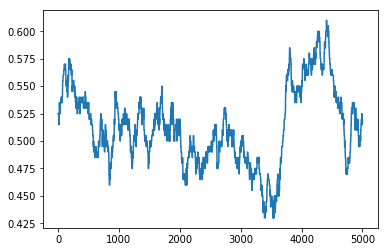

In [82]:
# Simulate 5000 intaerctions between 200 agents 
new_population, proportion = simulate(200, 5000)
print "Final Population:", new_population

# Make a plot of the changes in proportion of 'a' over interactions 
print '   '
print 'Changes in the proportion of [a] over time'
plt.plot(proportion)

Wonderful, this works! But as you can see, there is a lot of variance in the results of different simulated populations.

To get a real picture of what's going on, we'll need to run multiple simulations. 

So let's write a new function that makes a bunch of simulations at once:

In [69]:
# Create a function that run S simulations of a community of size N interacting randomly for K times    

def batch_simulate(n,k,s):
    batch_proportions=[]
    for i in range(s):
        new_population, proportion = simulate(n, k)
        batch_proportions.append(proportion)
    return batch_proportions
        

You can check if the function works by plotting the results of this batch simulation. Again, you can run this multiple times and manipulate the size of the community (n), the number of interactions (k) or the number of simulations (s).

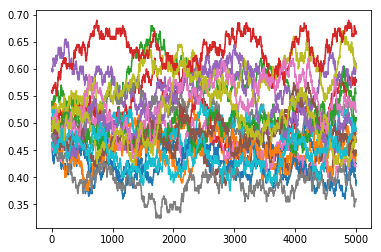

In [77]:
# Make 20 simulations of 5000 intaerctions between 200 agents 
results = batch_simulate(200,5000,20)

for i in results:
    plt.plot(i)

### 4. Let's try to make a prediction and test it!
You made it! You've just run your first simple sound change simulation!

Perhaps you noticed that the trend is towards not converging: even after 5000 interactions, the proportion of one variant is still around 0.5, meaning the both vowels are prevelant in the popuation and there hasn't been a change towards one vowel. 

This is because we start out with random populations in which some stubborn agents never change. We predict that if there are at least 2 stubborn agents with *different* vowels, the flexible agents in the community will keep adapting to these *different* stubborn agents and never reaching stability and convergence. 

So we check ourselves: under which conditions can the community converge? How many stubborn people can there be in a population and still have convergence? 

To test this, we will modify our functions to create biased populations, where we control the number of stubborn agents:

In [80]:
# Modify the function to make populations of N agents with a given number of stubborn agents (st)


def make_population_biased(N,st):
    
    population = []
    
    for i in range(st):
        
        v = random.randint(0,1)
        
        agent = make_agent(vowels[v], personalities[1])
        
        population.append(agent)
    
    for i in range(N-st):
        
        v = random.randint(0,1)
        
        agent = make_agent(vowels[v], personalities[0])
        
        population.append(agent)

    return population


# Modify the function so that it calls our biased population 

def simulate_biased(n, k, st):  #S=no. of stubborn
    
    population = make_population_biased(n,st)
    
    # print "Initial Population:", population
    
    proportion = []
    
    for i in range(k):
        
        pair = choose_pair(population)
        
        interact(pair)
        
        proportion.append(count(population))
    
    return population, proportion

Let's see what happens in  communities with no stubborn agents. Run this multiple times to see if any population reaches convergence (getting close to values of 1 or 0).

Changes in the proportion of [a] over time


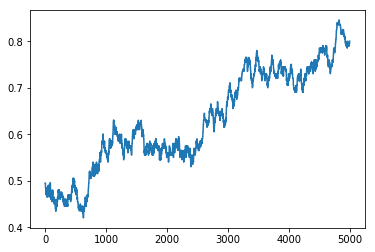

In [89]:
# Run a simulation in a community with no stubborn agents

new_population, proportion = simulate_biased(200, 5000, 0)
print 'Changes in the proportion of [a] over time'
plt.plot(proportion)

What about when there's one stubborn agent? Or two?

Changes in the proportion of [a] over time


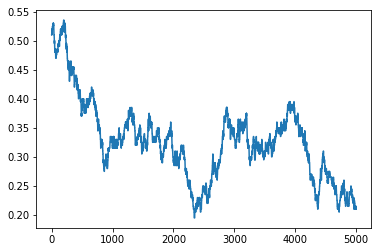

In [91]:
# Run a simulation in a community with 1 stubborn agents

new_population, proportion = simulate_biased(200, 5000, 1)
print 'Changes in the proportion of [a] over time'
plt.plot(proportion)

Changes in the proportion of [a] over time


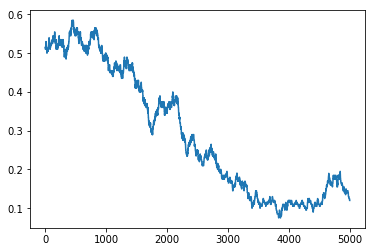

In [96]:
# Run a simulation in a community with 2 stubborn agents

new_population, proportion = simulate_biased(200, 5000, 2)
print 'Changes in the proportion of [a] over time'
plt.plot(proportion)

Again, there is too much variation. So let's run these simulations multiple times, unsing a wide range of proportions of stubborn people.

So let's run S simulations for each interating value of stubborn people. Here, we'll check what happens when there are 0, 1, 2, 25%, 50% and 100% stubborn agents in the population.

In [114]:
# Modify the function so it runs S simulations of each biased population

def batch_simulate_biased(n,k,s): #n-pop size, k=no. of interactions, s=no. of simulations for each bias
    
    all_results=[]
    
    possible_sts = [0, 1, 2, int(n / 4.), int(n / 2.), n]
    
    for possible_st in possible_sts:
        
        print possible_st
    
        current_results = []  # print the progress of the simulations 
    
        for i in range(s):

            new_population, proportion = simulate_biased(n, k, possible_st)
            current_results.append(proportion)
            
        all_results.append(current_results)
    
    return all_results

Now we can check how the proportion of stubborn agents affects convergence.

In [116]:
# Run 20 simulations of each stubborness proportions in a community of 200 agents 
results = batch_simulate_biased(200,5000,20)

0
1
2
50
100
200


Text(0,0.5,u'Proportion Individuals Using [a]')

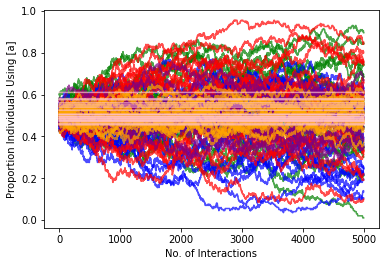

In [129]:
# Plot the results of the simulations 

colors = ['green', 'blue', 'red', 'purple', 'orange', 'pink']
for j, st in enumerate(results):
    for simulation in st:
        plt.plot(simulation, color = colors[j], alpha = .7)
        
plt.xlabel('No. of Interactions')
plt.ylabel('Proportion Individuals Using [a]')       

What we see is that when the only chances for convergence in when the population has only 0-2 stubborn agents, as we predicted. 

Great job! 